In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import os
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical 

In [2]:
classes = {'*': 0, '+': 1, '-': 2, '/': 3, '0': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '=': 14}
rev_classes = {v:k for k, v in classes.items()}

In [3]:
def load_dataset(_type):
    imgs, targets = [], []
    symbols = {"div":"/", "mul":"*","eq":"=", "sub":"-", "add":"+"}
    size = (28, 28)

    data_dir = f"../data/{_type}"
    if not os.path.isdir(data_dir):
        raise Exception(f"'{data_dir}' does not exist. Current dirrectory: {os.getcwd()}")
    
    for parent, dirs, files in os.walk(data_dir):
        if not '/' in parent:
            continue
            
        _, target = parent.rsplit("/", 1)
        if not target.isdigit() and target not in symbols:
            continue
    
        for file in files:
            im = cv2.imread(os.path.join(parent, file))
            if im is None:
                continue
                
            im = cv2.resize(im, dsize=size, interpolation=cv2.INTER_CUBIC)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                
            imgs.append(im)
            targets.append(classes[symbols.get(target, target)])

    X = np.asarray(imgs, dtype="float32")
    Y = np.asarray(targets, dtype="uint8")
    return X, Y
            

In [4]:
X_train, y_train = load_dataset("train")
X_test, y_test = load_dataset("test")

In [5]:
print(X_train.shape, y_train.shape)

(42749, 28, 28) (42749,)


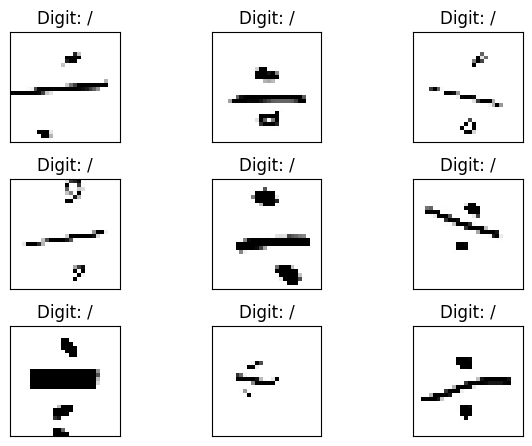

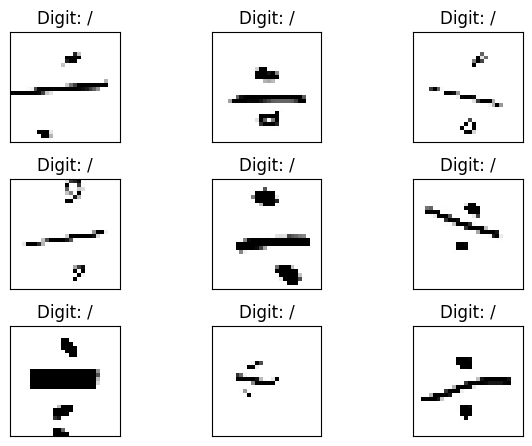

In [6]:
fig = plt.figure()
for i in range(9):
    
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(rev_classes[int(y_train[i])]))
    plt.xticks([])
    plt.yticks([])
fig

In [7]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# # building the input vector from the 128x128 pixels
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (42749, 28, 28)
y_train shape (42749,)
X_test shape (5356, 28, 28)
y_test shape (5356,)
Train matrix shape (42749, 784)
Test matrix shape (5356, 784)


In [8]:
n_classes = len(classes)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

In [9]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(n_classes))
model.add(Activation('softmax'))

/Users/kuba/Desktop/math-eq-recognition/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [48]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=100,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "..models/"
model_name = 'classifier.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/100
334/334 - 2s - 6ms/step - accuracy: 0.5053 - loss: 1.5740 - val_accuracy: 0.6292 - val_loss: 1.1970
Epoch 2/100
334/334 - 2s - 6ms/step - accuracy: 0.6363 - loss: 1.1551 - val_accuracy: 0.7121 - val_loss: 0.9581
Epoch 3/100
334/334 - 5s - 15ms/step - accuracy: 0.6898 - loss: 0.9954 - val_accuracy: 0.7560 - val_loss: 0.7996
Epoch 4/100
334/334 - 2s - 7ms/step - accuracy: 0.7193 - loss: 0.8925 - val_accuracy: 0.7659 - val_loss: 0.7504
Epoch 5/100
334/334 - 2s - 5ms/step - accuracy: 0.7421 - loss: 0.8198 - val_accuracy: 0.7849 - val_loss: 0.6659
Epoch 6/100
334/334 - 2s - 5ms/step - accuracy: 0.7571 - loss: 0.7685 - val_accuracy: 0.8152 - val_loss: 0.5948
Epoch 7/100
334/334 - 2s - 5ms/step - accuracy: 0.7687 - loss: 0.7348 - val_accuracy: 0.8226 - val_loss: 0.5885
Epoch 8/100
334/334 - 2s - 5ms/step - accuracy: 0.7817 - loss: 0.6946 - val_accuracy: 0.8458 - val_loss: 0.4978
Epoch 9/100
334/334 - 2s - 5ms/step - accuracy: 0.7959 - loss: 0.6447 - val_accuracy: 0.8344 - val_loss

Saved trained model at ..models/classifier.h5 


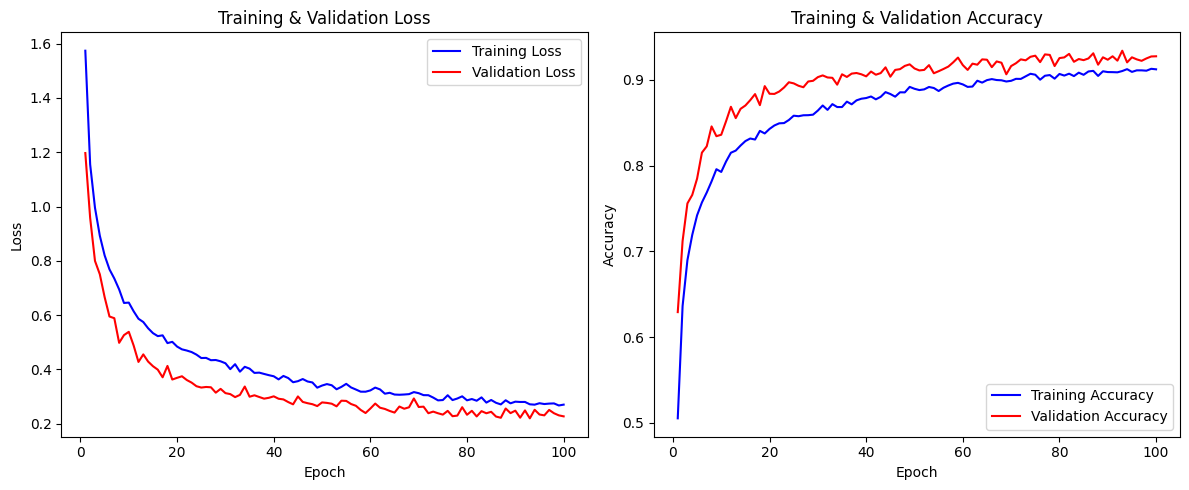

In [16]:
import matplotlib.pyplot as plt

# ----------------------
# 1) Copy your metrics into lists
# ----------------------
train_accuracy = [
    0.5053, 0.6363, 0.6898, 0.7193, 0.7421, 0.7571, 0.7687, 0.7817, 0.7959, 0.7927,
    0.8049, 0.8151, 0.8176, 0.8235, 0.8287, 0.8317, 0.8305, 0.8406, 0.8376, 0.8429,
    0.8469, 0.8494, 0.8497, 0.8533, 0.8583, 0.8577, 0.8588, 0.8589, 0.8595, 0.8643,
    0.8702, 0.8651, 0.8718, 0.8684, 0.8684, 0.8747, 0.8716, 0.8762, 0.8781, 0.8789,
    0.8807, 0.8774, 0.8803, 0.8858, 0.8836, 0.8805, 0.8856, 0.8855, 0.8919, 0.8897,
    0.8882, 0.8890, 0.8918, 0.8906, 0.8871, 0.8909, 0.8935, 0.8957, 0.8966, 0.8948,
    0.8919, 0.8923, 0.8991, 0.8969, 0.8998, 0.9010, 0.8999, 0.8996, 0.8982, 0.8990,
    0.9013, 0.9012, 0.9042, 0.9072, 0.9061, 0.9003, 0.9049, 0.9057, 0.9015, 0.9070,
    0.9051, 0.9073, 0.9045, 0.9085, 0.9060, 0.9099, 0.9106, 0.9047, 0.9101, 0.9092,
    0.9091, 0.9089, 0.9104, 0.9126, 0.9094, 0.9112, 0.9112, 0.9108, 0.9130, 0.9124
]

train_loss = [
    1.5740, 1.1551, 0.9954, 0.8925, 0.8198, 0.7685, 0.7348, 0.6946, 0.6447, 0.6460,
    0.6141, 0.5865, 0.5744, 0.5514, 0.5335, 0.5225, 0.5254, 0.4968, 0.5014, 0.4839,
    0.4738, 0.4694, 0.4638, 0.4544, 0.4418, 0.4423, 0.4338, 0.4345, 0.4297, 0.4225,
    0.4008, 0.4191, 0.3915, 0.4095, 0.4027, 0.3870, 0.3880, 0.3832, 0.3786, 0.3746,
    0.3631, 0.3758, 0.3680, 0.3526, 0.3565, 0.3644, 0.3554, 0.3518, 0.3326, 0.3404,
    0.3458, 0.3415, 0.3267, 0.3355, 0.3467, 0.3334, 0.3258, 0.3178, 0.3177, 0.3225,
    0.3329, 0.3261, 0.3104, 0.3137, 0.3073, 0.3065, 0.3074, 0.3088, 0.3163, 0.3123,
    0.3051, 0.3048, 0.2961, 0.2858, 0.2870, 0.3047, 0.2869, 0.2927, 0.3007, 0.2860,
    0.2907, 0.2845, 0.2968, 0.2776, 0.2872, 0.2769, 0.2709, 0.2862, 0.2749, 0.2810,
    0.2799, 0.2800, 0.2713, 0.2700, 0.2753, 0.2723, 0.2739, 0.2746, 0.2670, 0.2701
]

val_accuracy = [
    0.6292, 0.7121, 0.7560, 0.7659, 0.7849, 0.8152, 0.8226, 0.8458, 0.8344, 0.8361,
    0.8519, 0.8687, 0.8555, 0.8663, 0.8702, 0.8764, 0.8835, 0.8706, 0.8928, 0.8839,
    0.8837, 0.8865, 0.8912, 0.8973, 0.8960, 0.8932, 0.8915, 0.8982, 0.8990, 0.9033,
    0.9053, 0.9029, 0.9025, 0.8945, 0.9066, 0.9035, 0.9074, 0.9081, 0.9066, 0.9042,
    0.9098, 0.9061, 0.9080, 0.9147, 0.9038, 0.9117, 0.9126, 0.9164, 0.9182, 0.9134,
    0.9111, 0.9117, 0.9173, 0.9078, 0.9102, 0.9128, 0.9156, 0.9205, 0.9261, 0.9173,
    0.9117, 0.9190, 0.9178, 0.9240, 0.9236, 0.9149, 0.9216, 0.9201, 0.9066, 0.9162,
    0.9195, 0.9240, 0.9229, 0.9270, 0.9283, 0.9208, 0.9298, 0.9292, 0.9162, 0.9255,
    0.9263, 0.9304, 0.9212, 0.9244, 0.9231, 0.9251, 0.9311, 0.9178, 0.9264, 0.9236,
    0.9276, 0.9225, 0.9341, 0.9205, 0.9264, 0.9240, 0.9223, 0.9251, 0.9274, 0.9276
]

val_loss = [
    1.1970, 0.9581, 0.7996, 0.7504, 0.6659, 0.5948, 0.5885, 0.4978, 0.5262, 0.5384,
    0.4880, 0.4274, 0.4552, 0.4287, 0.4117, 0.3989, 0.3708, 0.4127, 0.3626, 0.3689,
    0.3746, 0.3608, 0.3512, 0.3380, 0.3330, 0.3352, 0.3340, 0.3142, 0.3282, 0.3125,
    0.3089, 0.2978, 0.3060, 0.3368, 0.2993, 0.3045, 0.2982, 0.2921, 0.2953, 0.3007,
    0.2918, 0.2893, 0.2795, 0.2712, 0.3003, 0.2801, 0.2754, 0.2717, 0.2648, 0.2783,
    0.2765, 0.2735, 0.2638, 0.2846, 0.2838, 0.2724, 0.2659, 0.2505, 0.2392, 0.2558,
    0.2740, 0.2587, 0.2542, 0.2468, 0.2408, 0.2631, 0.2550, 0.2603, 0.2928, 0.2614,
    0.2626, 0.2385, 0.2444, 0.2383, 0.2333, 0.2471, 0.2275, 0.2297, 0.2606, 0.2328,
    0.2473, 0.2266, 0.2461, 0.2383, 0.2437, 0.2262, 0.2217, 0.2559, 0.2388, 0.2479,
    0.2220, 0.2488, 0.2196, 0.2512, 0.2337, 0.2306, 0.2506, 0.2384, 0.2306, 0.2269
]

# ----------------------
# 2) Plot the data
# ----------------------
epochs = range(1, 101)  # Since there are 100 epochs

plt.figure(figsize=(12, 5))

# -- Plot Loss --
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# -- Plot Accuracy --
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score, recall_score

# 1. Load your model
classifier = load_model("..models/classifier.h5")

# 2. Evaluate model to get loss & accuracy
loss_and_metrics = classifier.evaluate(X_test, Y_test, verbose=2)
print("Test Loss:", loss_and_metrics[0])
print("Test Accuracy:", loss_and_metrics[1])

# 3. Get predictions
y_pred_probs = classifier.predict(X_test)  # shape = (num_samples, num_classes)

# 4. Convert to integer labels if Y_test is one-hot
y_true = np.argmax(Y_test, axis=1)        # shape = (num_samples,)
y_pred = np.argmax(y_pred_probs, axis=1)  # shape = (num_samples,)

# 5. Calculate F1 and Recall
f1 = f1_score(y_true, y_pred, average='macro')     # or 'weighted' or 'micro'
recall = recall_score(y_true, y_pred, average='macro')

print("F1 Score:", f1)
print("Recall:", recall)

168/168 - 0s - 2ms/step - accuracy: 0.9276 - loss: 0.2269
Test Loss: 0.22687922418117523
Test Accuracy: 0.9275578856468201
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
F1 Score: 0.9264273106387756
Recall: 0.9267713060236777


In [13]:
[type(x) for x in loss_and_metrics]

[float, float]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step

4943  classified correctly
413  classified incorrectly


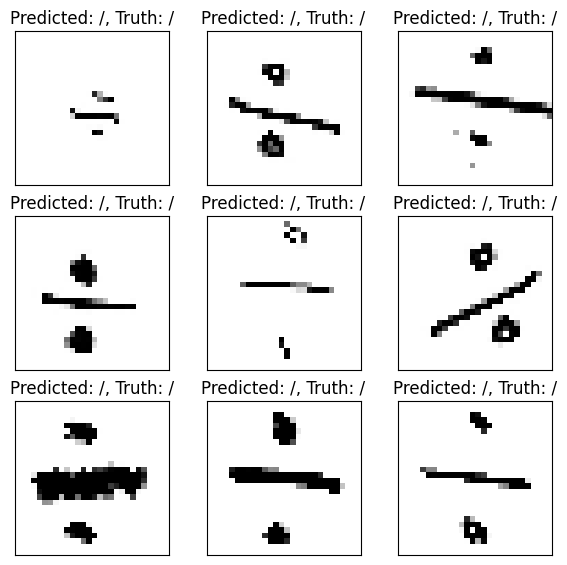

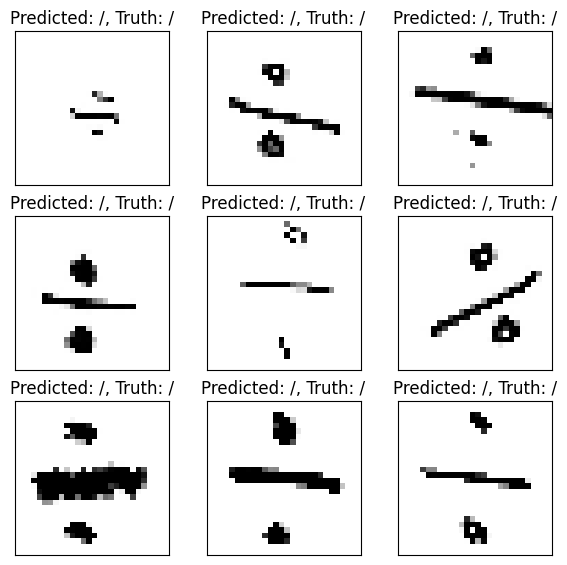

In [ ]:
# load the model and create predictions on the test set
classifier = load_model("..models/classifier.h5")
predict_x=model.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    predicted, target = rev_classes[predicted_classes[correct]], rev_classes[y_test[correct]]
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted,target))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[30:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    predicted, target = rev_classes[predicted_classes[incorrect]], rev_classes[y_test[incorrect]]
    
    plt.title(
      "Predicted {}, Truth: {}".format(predicted, target))
    plt.xticks([])
    plt.yticks([])

figure_evaluation